**Importing libraries**

In [1]:
#### 1. Importing Libraries ####
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

**Importing the dataset**



In [2]:
from google.colab import files
 
 
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df = pd.read_csv("Lung Cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


**Understanding the dataset**

What is the shape of the dataset?

In [ ]:
df.shape

(309, 16)

Gathering info on dataset attributes and datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Analysis on continuous columns

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Here are the following observations from the describe method:
1. The mean AGE in the dataset is 62.67, which means the dataset contains mostly older people
2. The means of all columns (SMOKING, YELLOW_FINGERS, PEER_PRESSURE, etc.) are >1.5 except for ANXIETY and SWALLOWING_DIFFICULTY, which indicates that most observations in the dataset has indicated "YES" to these attributes. 
3. Following from 2, "YES" to most of the attributes indicate a risk of lung cancer. 

Checking for null values

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

There are no null values

Checking for duplicate rows

In [ ]:
df.duplicated().sum()

33

There are 33 duplicate rows in the dataset

Getting rid of these rows

In [ ]:
df.drop_duplicates(inplace=True)

What is the shape of the dataset after removing duplicate rows? 

In [ ]:
df.shape

(276, 16)

Our final dataset has 276 rows and 16 columns

A short preprocessing step before we move on to Data Exploration. 

The GENDER column contains values "MALE" and "FEMALE". Let's encode that to "MALE" = 1 and "FEMALE" = 0.

The LUNG_CANCER columnn contains values "YES" and "NO". Let's encode that to "YES" = 1 and "NO" = 0


In [ ]:
encoder = LabelEncoder()
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


**Exploratory Data Analysis**

Separating continuous and categorical columns

In [ ]:
con_col = ['AGE']
cat_col = []
for i in df.columns:
    if i != 'AGE':
        cat_col.append(i)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


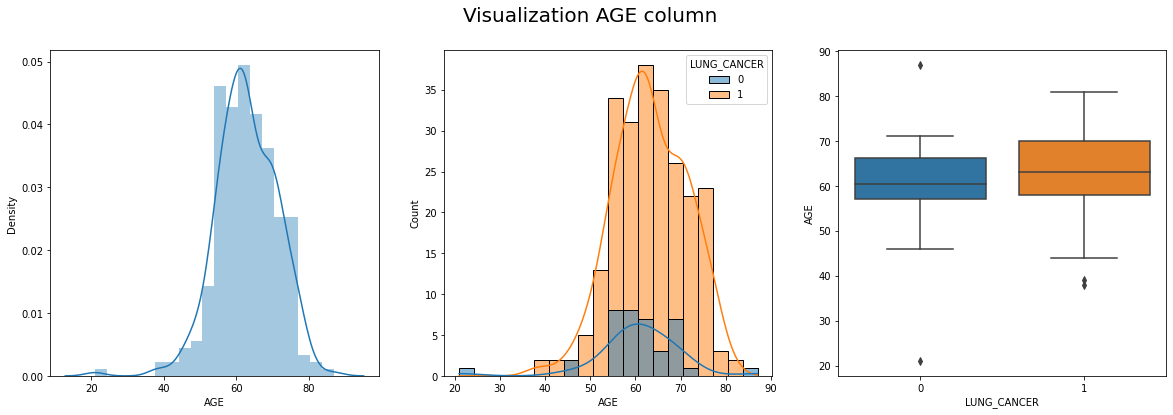

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.distplot(df['AGE'], ax=ax[0])
sns.histplot(data=df, x='AGE', ax=ax[1], hue='LUNG_CANCER', kde=True)
sns.boxplot(x=df['LUNG_CANCER'], y=df['AGE'], ax=ax[2])
plt.suptitle("Visualization AGE column", size=20)
plt.show()

Here are the observations from the plots above:
1. The box plot on the right shows that there exists a few outliers in the dataset. 
2. Most observations fall within the range 50 < AGE < 70, which agrees with the describe method above that shows mean AGE is 62.67. 
3. There exists more cases of "YES" to lung cancer than "NO" to lung cancer

Plotting a countplot for GENDER with LUNG_CANCER as classification

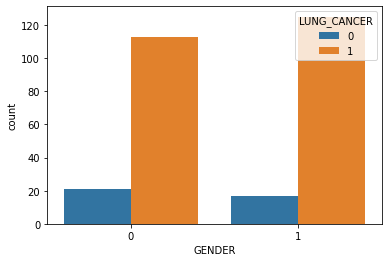

In [ ]:
sns.countplot(data = df, x = df["GENDER"], hue="LUNG_CANCER")

Observation: 
1. The countplot above shows that the number of males that responded "YES" to LUNG_CANCER is more than the number of females with "YES" to LUNG_CANCER
2. The number of "YES" to LUNG_CANCER observations are much greater than the number of "NO" to LUNG_CANCER observations. There is a large discrepancy between the two classes of LUNG_CANCER

Plotting a heatmap to investigate the correlations between the attributes:

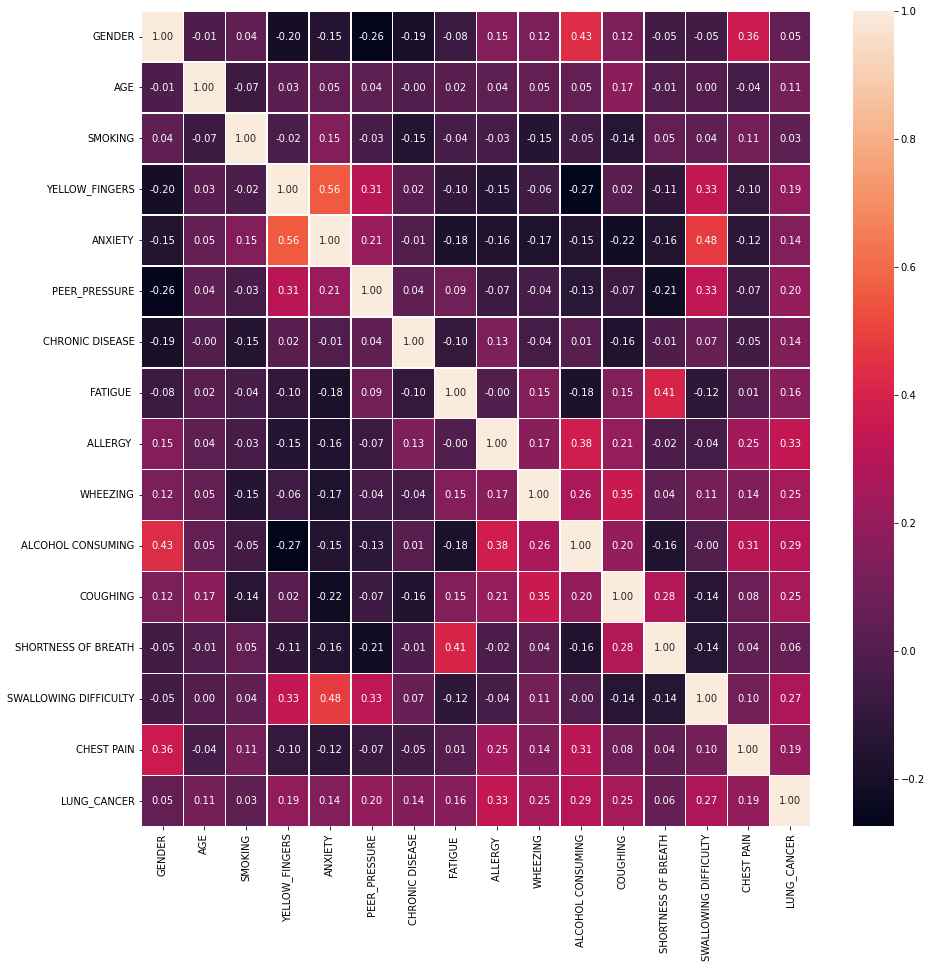

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='0.2f')

Observation: There exists a lot of multicollinearity between the attributes of the dataset as indicated by the darker cells in the heatmap. 

Creating the feature matrix X and target vector Y:

In [ ]:
X = df.drop(['LUNG_CANCER'], axis=1)
y = df['LUNG_CANCER']

Since all attributes columns consist of 2 = "YES" and 1 = "No", we must replace these values to 1 = "YES" and 0 = "No" to make it easier for the machine learning model to learn from the train set later. 

In [ ]:
for i in X.columns[2:]:
    temp = []
    for j in X[i]:
        temp.append(j-1)
    X[i] = temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


It is usually the minority class variables that contains the predictor variables. This is why oversampling minority classes is important. We use the IMBLearn library to do this:

In [ ]:
X_over, y_over = RandomOverSampler().fit_resample(X, y)

Splitting dataset into train and test datasets: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_over, y_over, random_state=42, stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


Finding the mean and standard deviation of AGE from the feature matrix X_train. This will be useful later to convert user input AGE to scalar fit with the rest of the AGE column:

In [ ]:
age_mean = X["AGE"].mean()
print(age_mean)

age_sd = X["AGE"].std()
print(age_sd)

62.90942028985507
8.37935460896089


The mathematical formula for Scalar Fit Transformation on AGE column is: 

    (age-age_mean)/(age_sd)

This formula will come handy when we take AGE user input in our application. For model training, we use StandardScaler() to scale the AGE column to comply with other variables that are either 0s or 1s. 

In [ ]:
scaler = StandardScaler()
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])
X_test['AGE'] = scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,0,0.091189,0,0,0,0,1,1,0,0,0,0,1,0,0
336,0,1.011456,1,0,0,0,1,1,0,0,0,0,1,0,0
334,0,-0.138878,0,0,0,0,1,1,0,0,0,0,1,0,0
151,0,0.206222,1,1,0,1,1,0,0,0,0,0,0,0,0
314,0,-0.483978,0,0,0,0,0,1,0,0,0,0,1,0,0


Testing KNeighbors Classifier:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119



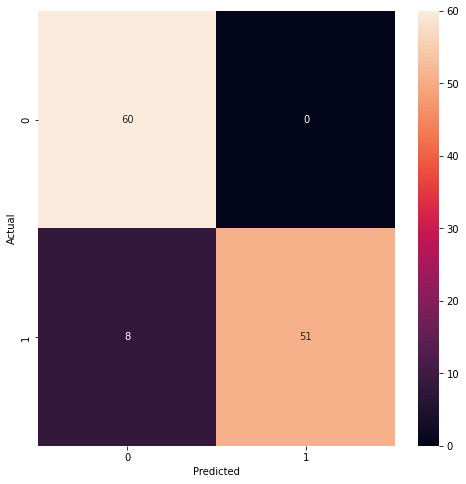

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_knn = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_knn, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test, knn.predict(X_test)))

Observations: The KNeighbors Classifier ML model's F1 score is 93% for "YES" to LUNG_CANCER. The sensitivitiy is **86%** which is very low for our application since it is dealing with cancer detection. Such an application would need a higher sensitivity. 

Testing Support Vector Machine

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Best Parameters of SVC model is : {'gamma': 100, 'C': 1}



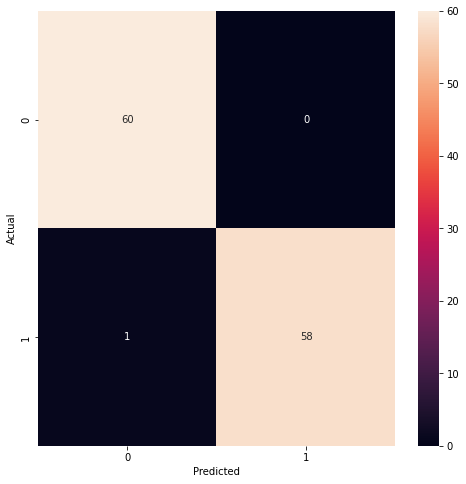

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
rcv = RandomizedSearchCV(SVC(), param_grid, cv=5)
rcv.fit(X_train, y_train)
y_pred_svc = rcv.predict(X_test)
confusion_svc = confusion_matrix(y_test, rcv.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_svc, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test, y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

Observations: The Support Vector Machine ML model's F1 score is 99% for "YES" to LUNG_CANCER. The sensitivitiy of the model is **98%** which is high and acceptable for our application since it is dealing with cancer detection. Let us try one last ML model. 

Testing LGBM Classifier

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.90      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



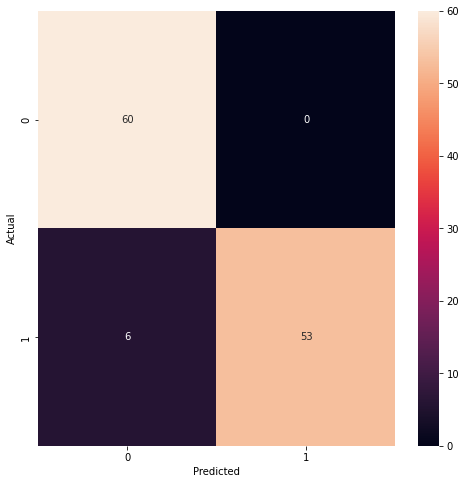

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test, y_pred))

Observations: The LGBM Classifier ML model's F1 score is 95% for "YES" to LUNG_CANCER. The sensitivitiy is **90%** which is high and but not acceptable for our application since it is dealing with cancer detection.

**Therefore, we choose Support Vector Machine ML model for our Lung Cancer Detection application. **

Moving on to the application itself,

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9243697478991597


In [ ]:
age=int(input("enter age"))
g=(age-age_mean)/(age_sd)
print(g)

enter age67
0.48817360059812476


In [ ]:
a=15
features = np.empty(a)
print("Enter in order: gender, age, smoking, yellow fingers, anxiety, peer pressure, chronic disease, fatigue, allergy, wheezing, alcohol, coughing, shortness breath, swallowing, chest pain")
for i in range (len(features)):
    x=float(input('Enter Elements'))
    features[i]=x
print(np.floor(features))
features1=[features]
# using inputs to predict the output
prediction = clf.predict(features1)
print("Prediction: {}".format(prediction))

Enter in order: gender, age, smoking, yellow fingers, anxiety, peer pressure, chronic disease, fatigue, allergy, wheezing, alcohol, coughing, shortness breath, swallowing, chest pain
Enter Elements1
Enter Elements0.48
Enter Elements0
Enter Elements0
Enter Elements1
Enter Elements1
Enter Elements1
Enter Elements0
Enter Elements0
Enter Elements1
Enter Elements1
Enter Elements1
Enter Elements0
Enter Elements1
Enter Elements0
[1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.]
Prediction: [1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
